# El modelo *Integrate and Fire*

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{eqnarray}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

* $V_u \approx -50mV$ representa un potencial umbral.

In [735]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

import ode

## Mecanismo de disparo DESACTIVADO

Para $I=0$

\begin{eqnarray}
V(t)
&=&
E+\left(V(0)-E\right)e^{-\frac{t}{\tau}}
\end{eqnarray}

In [736]:
E = -65 #mV
tau = 10 #ms
V0 = 10 #mV

def V(t):
    return E+(V0-E)*np.exp(-t/tau)

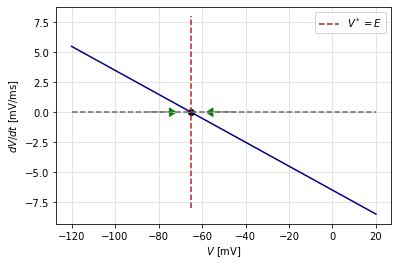

In [737]:
Vfix = E
def f(V):
    return (E-V)/tau
plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt$ [mV/ms]')
valores_V=np.linspace(-120,20,100)
valores_f=np.vectorize(f)(valores_V)
plt.plot(valores_V,valores_f,label="",linestyle='-',c='navy')
plt.plot(valores_V,np.zeros(len(valores_V)),label="",linestyle='--',c='dimgrey')
plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E$",linestyle='--',c='firebrick')
plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.7,head_length=3,fc='g',ec='g')
plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.7,head_length=3,fc='g',ec='g')
plt.scatter([Vfix],[0],c='black')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('fijo-subt-0nA.pdf', dpi=600, format='pdf')

Ahora, $I=2$nA constante
\begin{eqnarray}
V(t)
&=&
V^*+\left(V(0)-V^*\right)e^{-\frac{t}{\tau}}
\end{eqnarray}

In [738]:
E = -65 #mV
tau = 10 #ms
V0 = 10 #mV
I = 2 #nA
R = 10 #MOhms
Vfix = E+I*R
def V(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

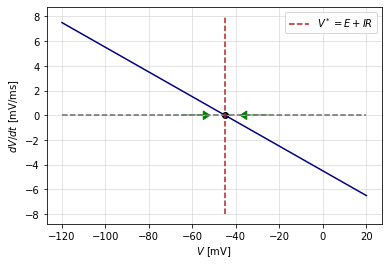

In [739]:
def f(V):
    return (Vfix-V)/tau
plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt$ [mV/ms]')
valores_V=np.linspace(-120,20,100)
valores_f=np.vectorize(f)(valores_V)
plt.plot(valores_V,valores_f,label="",linestyle='-',c='navy')
plt.plot(valores_V,np.zeros(len(valores_V)),label="",linestyle='--',c='dimgrey')
plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E+IR$",linestyle='--',c='firebrick')
plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.7,head_length=3,fc='g',ec='g')
plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.7,head_length=3,fc='g',ec='g')
plt.scatter([Vfix],[0],c='black')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('fijo-subt-2nA.pdf', dpi=600, format='pdf')

### Solución exacta a valores iniciales

In [740]:
E   = -65 #mV
tau = 10  #ms
R   = 10  #mOhms
I0  = 2   #nA
V0=E
Vfix = E+I0*R

def Vexacta(t):
    return V0+R*I0*(1-np.exp(-t/tau))

TypeError: object of type 'numpy.float64' has no len()

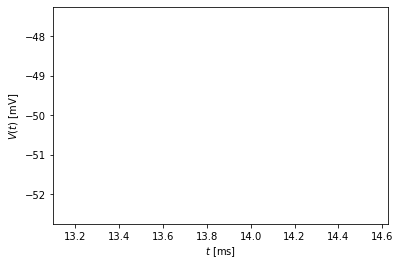

In [741]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,np.vectorize(Vexacta)(valores_t),label="",linestyle='-',c='navy', linewidth=1.0)
plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='firebrick')
plt.grid(color='gainsboro')
plt.legend()

### Solución con RK4 a valores iniciales

In [751]:
def I(t):
    return I0 #nA

p = [E,tau,R,I,Vu]

def f(x,t,p):
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    Vu  = p[4]

    donde I : t -> I(t)
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    #Vu  = p[4]
    return np.array([(E+R*I(t)-V)/tau])

In [752]:
a  = 0   #ms
b  = 200 #ms
xa = np.array([E])
h = 0.05 # ms
k = int((b-a)/h)

In [753]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

In [ ]:
V0=E
Vfix = E+I(0)*R
def Vrk4(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='firebrick')
plt.plot(valores_t,np.vectorize(Vrk4)(valores_t),label="RK4", c ='mediumseagreen', marker=".", markersize=4.5)
plt.plot(valores_t,np.vectorize(Vex)(valores_t),label="Exacta",linestyle='-',c='navy', linewidth=1.5)
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('exacta-vs-rk4.pdf', dpi=600, format='pdf')

## Mecanismo de disparo ACTIVADO

In [ ]:
E   = -65 #mV
tau = 10  #ms
R   = 10  #mOhms
I0  = 2   #nA
def I(t):
    return I0 #nA
Vu  = -50 #mV

p = [E,tau,R,I,Vu]

def f(x,t,p):
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    Vu  = p[4]

    donde I : t -> I(t)
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    #Vu  = p[4]
    return np.array([(E+R*I(t)-V)/tau])

def c(x,t,p):
    """
    V   = x[0]
    E   = p[0]
    tau = p[1]
    R   = p[2]
    I   = p[3]
    Vu  = p[4]

    donde I : t -> I(t)
    """  
    V   = x[0]
    E   = p[0]
    #tau = p[1]
    #R   = p[2]
    #I   = p[3]
    Vu  = p[4]
    if V>Vu:
        V=E
    return np.array([V])

In [ ]:
a  = 0   #ms
b  = 200 #ms
xa = np.array([E])
h = 0.05 # ms
k = int((b-a)/h)

In [ ]:
t,w = ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

In [ ]:
V0=E
Vfix = E+I(0)*R
def Vex(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

In [ ]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="RK4 (con disparo)",linestyle='-',c='forestgreen')
plt.plot(valores_t,np.vectorize(Vex)(valores_t),label="Exacta (sin disparo)",linestyle='-',c='navy')
plt.plot(valores_t,[Vfix]*len(valores_t),label="$V^*$",linestyle='--',c='firebrick')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='k')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('disparo-2nA.pdf', dpi=600, format='pdf')

El período de disparo es

\begin{eqnarray}
t
&=&
\tau\ln\bigg(\frac{I_0R}{E+RI_0-V_u}\bigg)
\end{eqnarray}

In [ ]:
# Corriente crítica
Ic = (Vu-E)/R

In [742]:
def periodo(I0):
    return tau*np.log(I0*R/(I0*R+E-Vu))    
def frecuencia(I0):
    return 1/periodo(I0)

In [743]:
I0 = 2 #nA
t = periodo(I0)
frec = frecuencia(I0)
print("El período para el caso en que I_0=2nA es",t,"ms y la frecuencia es",frec," Hz ->Frecuencia posta!")
print("Esto coincide (aproximadamente) con lo observado en la figura.")

El período para el caso en que I_0=2nA es 13.862943611198906 ms y la frecuencia es 0.07213475204444816  Hz ->Frecuencia posta!
Esto coincide (aproximadamente) con lo observado en la figura.


### Cálculo de la frecuencia numérica

In [744]:
valores_I0 = np.linspace(Ic+0.01,2*Ic,10)

def integrador(i):
      
    E   = -65 #mV
    tau = 10  #ms
    R   = 10  #mOhms
    I0  = i   #nA
    def I(t):
        return I0 #nA
    Vu  = -50 #mV

    p = [E,tau,R,I,Vu]

    def f(x,t,p):
        """
        V   = x[0]
        E   = p[0]
        tau = p[1]
        R   = p[2]
        I   = p[3]
        Vu  = p[4]

        donde I : t -> I(t)
        """
        V   = x[0]
        E   = p[0]
        tau = p[1]
        R   = p[2]
        I   = p[3]
        #Vu  = p[4]
        return np.array([(E+R*I(t)-V)/tau])

    def c(x,t,p):
        """
        V   = x[0]
        E   = p[0]
        tau = p[1]
        R   = p[2]
        I   = p[3]
        Vu  = p[4]

        donde I : t -> I(t)
        """  
        V   = x[0]
        E   = p[0]
        #tau = p[1]
        #R   = p[2]
        #I   = p[3]
        Vu  = p[4]
        if V>Vu:
            V=E
        return np.array([V])
    
    t,w = ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)
    
    return t,w

In [745]:
p = [integrador(i) for i in valores_I0]

In [746]:
def frecuencia_num(k):
    A = np.vstack((p[k][0], p[k][1]))
    B = A[:, A[1] == np.max(p[k][1])]
    return 1/(B[0, 2] - B[0, 1])

In [747]:
frec_num = [frecuencia_num(k) for k in range(0, len(p))]
frec_num

[0.019920318725098196,
 0.04424778761062197,
 0.05917159763313946,
 0.07246376811594449,
 0.08510638297872385,
 0.09708737864077532,
 0.10928961748633724,
 0.12048192771084167,
 0.13245033112582594,
 0.1438848920863289]

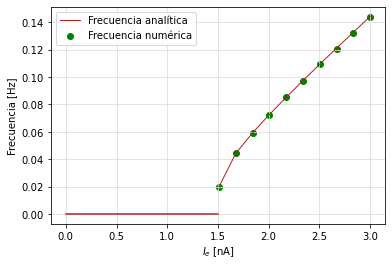

In [748]:
plt.xlabel('$I_e$ [nA]')
plt.ylabel('Frecuencia [Hz]')
plt.plot(np.linspace(0,Ic,10),np.zeros(10),label="",linestyle='-',c='firebrick')
plt.plot(valores_I0,np.vectorize(frecuencia)(valores_I0),label="Frecuencia analítica",linestyle='-', linewidth=1.0, c='firebrick')
plt.scatter(valores_I0, frec_num, label="Frecuencia numérica",linestyle='-',c='g')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('frecuencias.pdf', dpi=600, format='pdf')

## Corriente 1 dep de t: $ I(t) = I_0 cos$

(Correr de nuevo el primer RK4)

In [754]:
a=0   #ms
b=500 #ms
I0 = 2.5 #nA
def I(t):
    return I0*np.cos(t/30)
p = [E,tau,R,I,Vu]

In [755]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

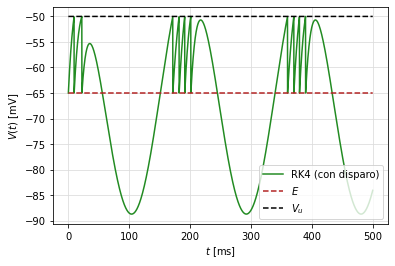

In [756]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="RK4 (con disparo)",linestyle='-',c='forestgreen')
plt.plot(valores_t,[E]*len(valores_t),label="$E$",linestyle='--',c='firebrick')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='k')
#plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('disparo-2,5nA.pdf', dpi=600, format='pdf')

## Corriente 2 dep de t: $ I(t) = I_0 [cos + sen + ....] $

In [757]:
a=0   #ms
b=200 #ms
I0 = 0.35 #nA
def I(t):
    return I0*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2
p = [E,tau,R,I,Vu]

In [758]:
t,w= ode.integrador_ode(ode.rk4,f,xa,a,b,k,p,c=c)

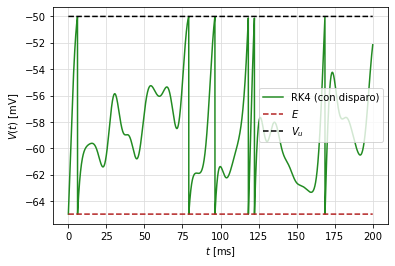

In [759]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V(t)$ [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label="RK4 (con disparo)",linestyle='-',c='forestgreen')
plt.plot(valores_t,[E]*len(valores_t),label="$E$",linestyle='--',c='firebrick')
plt.plot(valores_t,[Vu]*len(valores_t),label="$V_u$",linestyle='--',c='k')
plt.grid(color='gainsboro')
plt.legend()
plt.savefig('disparo-0,35nA.pdf', dpi=600, format='pdf')